<a href="https://colab.research.google.com/github/rohan-singh987/DeepAudioClassifier/blob/rohan/speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SPEECH EMOTION RECOGNITION (SER)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing The Dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import IPython.display as ipd
from librosa.display import waveshow
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# initiating directory path
CREME = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/CREME/AudioWAV/'
rav = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/ravdess/'
TESS = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/TESS TORONTO/TESS Toronto emotional speech set data/'

In [ ]:
import os

# loading CREME data, create list of emtions and path for audio files
emotion = []
path = []

# for loop to loop through directory
for i in os.listdir(CREME):
    if i.split('_')[-2] == 'FEA' :
        emotion.append('fear')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'ANG' :
        emotion.append('angry')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'DIS' :
        emotion.append('disgust')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'HAP' :
        emotion.append('happy')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'NEU' :
        emotion.append('neutral')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'SAD' :
        emotion.append('sad')
        path.append(CREME + i)
        
# convertig it into dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
creme_df = pd.concat([emotion_df,path_df],axis = 1)

In [ ]:
creme_df.head()

,emotion,path
0,neutral,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
1,sad,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
2,disgust,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
3,happy,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
4,fear,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...


In [ ]:
# loading ravdess data

emotion = []
path = []

for i in os.listdir(rav) :
    # 20 actors in directory
    for aud in os.listdir(rav + i) :
        split = aud.split('.')[0].split('-')
        temp = int(split[2])
        
        if split[2] == '01' :
            emotion.append('neutral')
            path.append(rav + i +'/' + aud)
        if split[2] == '02' :
            emotion.append('calm')
            path.append(rav + i +'/' + aud)
        if split[2] == '03' :
            emotion.append('happy')
            path.append(rav + i +'/' + aud)
        if split[2] == '04' :
            emotion.append('sad')
            path.append(rav + i +'/' + aud)
        if split[2] == '05' :
            emotion.append('angry')
            path.append(rav + i +'/' + aud)
        if split[2] == '06' :
            emotion.append('fear')
            path.append(rav + i +'/' + aud)
        if split[2] == '07' :
            emotion.append('disgust')
            path.append(rav + i +'/' + aud)
        if split[2] == '08' :
            emotion.append('suprised')
            path.append(rav + i +'/' + aud)
            
# creating dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
rav_df = pd.concat([emotion_df,path_df],axis = 1)

In [ ]:
rav_df.head()

,emotion,path
0,neutral,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
1,calm,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
2,neutral,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
3,calm,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
4,neutral,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...


In [ ]:
# loading tess data

emotion = []
path = []

for i in os.listdir(TESS) :
  fname = os.listdir(TESS + i) 
  for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry' :
            emotion.append('angry')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_disgust' or i == 'YAF_disgust' :
            emotion.append('disgust')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_Fear' or i == 'YAF_fear' :
            emotion.append('fear')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_happy' or i == 'YAF_happy' :
            emotion.append('happy')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_neutral' or i == 'YAF_neutral' :
            emotion.append('neutral')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_pleasant_surprise' or i == 'YAF_surprise' :
            emotion.append('surprise')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_angry' or i == 'YAF_angry' :
            emotion.append('angry')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_Sad' or i == 'YAF_sad' :
            emotion.append('sad')
            path.append(TESS + i + '/' + f)
            
# creating dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
tess_df = pd.concat([emotion_df,path_df],axis = 1)

In [ ]:
tess_df.head()

,emotion,path
0,angry,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
1,angry,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
2,angry,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
3,angry,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
4,angry,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...


In [ ]:
tess_df.iloc[0,1]

'/content/drive/MyDrive/SPEECH EMOTION REGCONITION/TESS TORONTO/TESS Toronto emotional speech set data/OAF_angry/OAF_fall_angry.wav'

In [ ]:
# combining all dataframe

audio_df  = pd.concat([
    creme_df,rav_df,tess_df
],axis = 0)

audio_df.reset_index(drop = 'index',inplace = True)

In [ ]:
audio_df

,emotion,path
0,neutral,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
1,sad,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
2,disgust,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
3,happy,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
4,fear,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
...,...,...
11773,sad,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
11774,sad,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
11775,sad,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
11776,sad,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...


In [ ]:
# saving audio_csv
audio_df.to_csv('audio.csv')

#### visualization

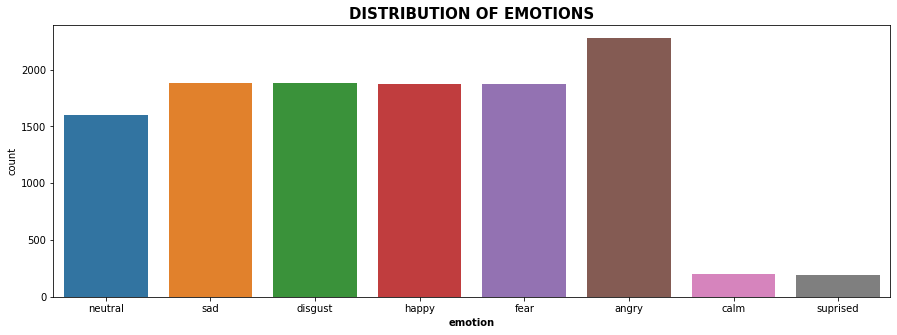

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = audio_df,x= 'emotion')
plt.title('DISTRIBUTION OF EMOTIONS',fontweight = 'bold',fontsize = 15)
plt.xlabel('emotion',fontweight = 'bold');

In [ ]:
def audio_visual(path,emotion) :
    data , sample_rate = librosa.load(path)
    plt.figure(figsize = (10,5))
    plt.title(f'Waveplot for audion with {emotion} emotions')
    waveshow(data,sample_rate)
    plt.show()
    
    return ipd.Audio(path)

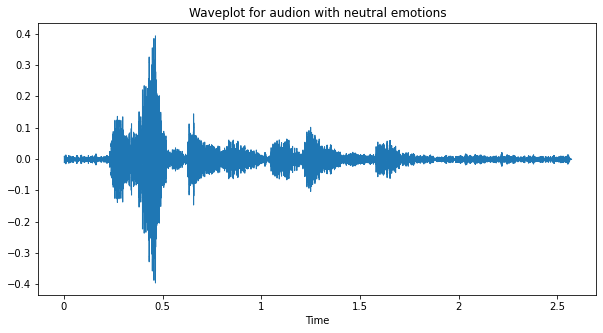

In [ ]:
# neutral
audio_visual(audio_df['path'][0],emotion = 'neutral')

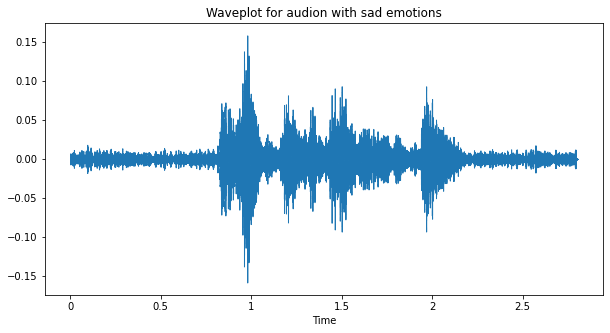

In [ ]:
# sad
audio_visual(audio_df['path'][1],emotion = 'sad')

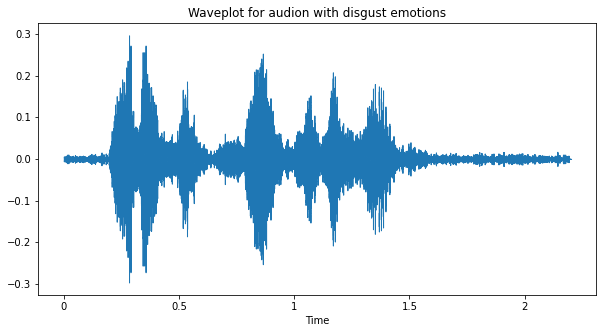

In [ ]:
# disgust
audio_visual(audio_df['path'][2],emotion = 'disgust')

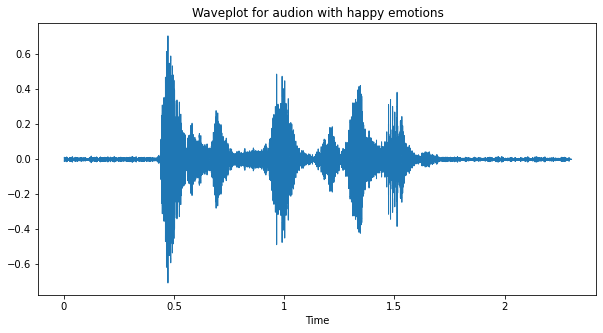

In [ ]:
# happy
audio_visual(audio_df['path'][3],emotion = 'happy')

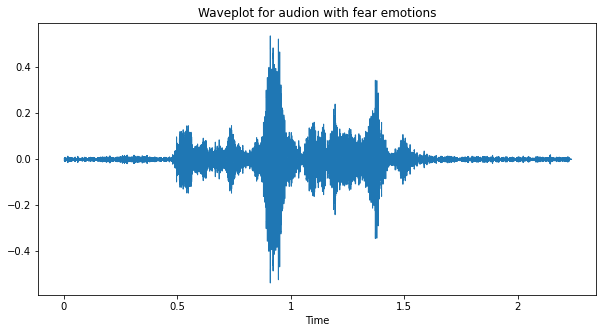

In [ ]:
# fear
audio_visual(audio_df['path'][4],emotion = 'fear')

## FEATURE EXTRACTION
 the data provided from audio cannot be understood by the models directly, so we need to convert them into an understandable format for which feature extraction is used. The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

Looking at the waveplots above seems clear (from an eye test) that the waveform itself may not necessarily yield clear class identifying information. Infact they look quite similar.

It turns out one of the best tool to feature extract from audio waveforms ( and digital signal in general) is Mel Frequency Cepstral Coefficents (MFCCs). 

## Data Augmentation

In [ ]:
def feature_extraction(file) :
  mfcc_features = librosa.feature.mfcc(y=file,sr = sample_rate,n_mfcc = 40)
  mfcc_scaled_feature = np.mean(mfcc_features.T,axis = 0)
  return mfcc_scaled_feature

  # NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
#higher speed
def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)
# lower speed
def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

In [ ]:
# Trying different functions above
path = np.array(audio_df['path'])[471]
data, sample_rate = librosa.load(path)

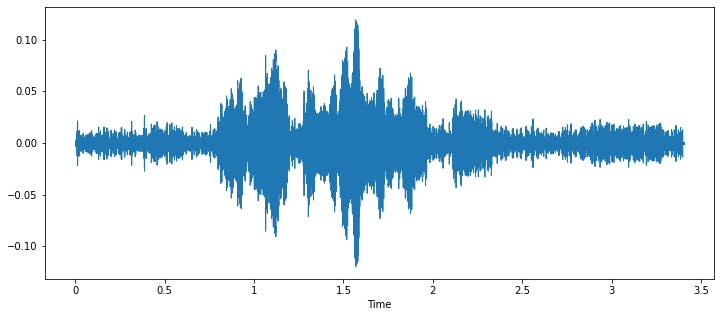

In [ ]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(path)

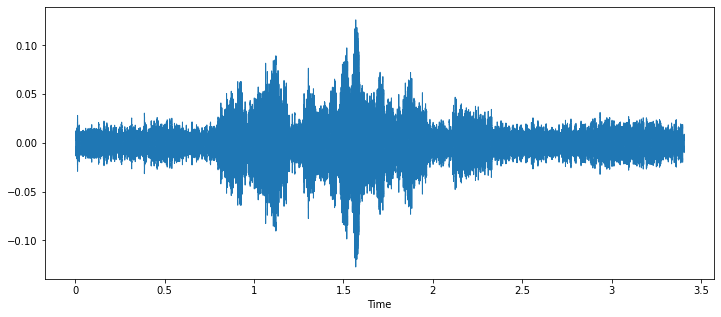

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

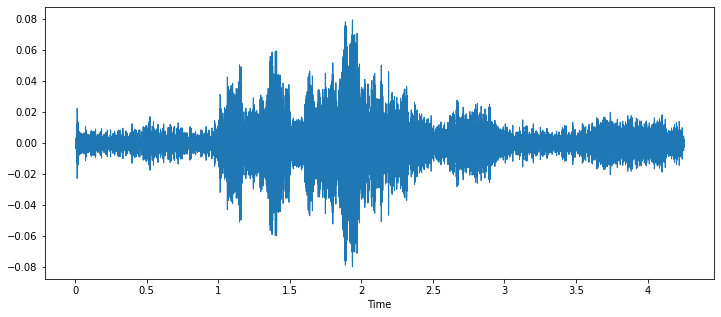

In [ ]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

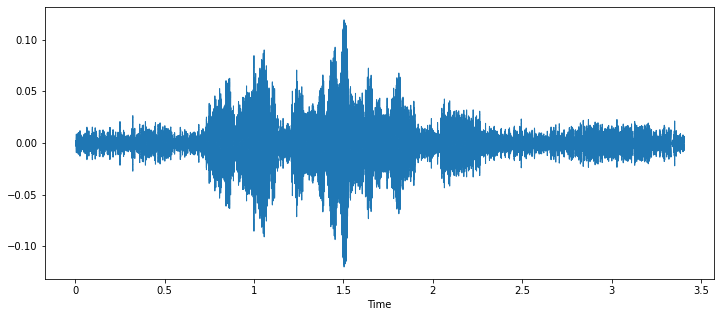

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

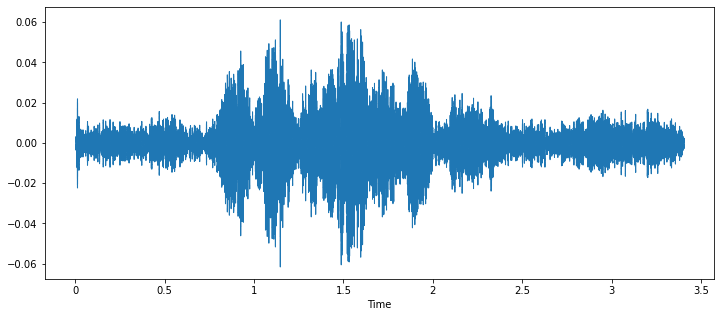

In [ ]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [ ]:
def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feature_extraction(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feature_extraction(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feature_extraction(data_stretch_pitch)
    result = np.vstack((result, res3))
    # data with high speed
    high_speed = higher_speed(data)
    res4 = feature_extraction(high_speed)
    result = np.vstack((result,res4))
    # data with low speed
    low_speed = lower_speed(data)
    res5 = feature_extraction(high_speed)
    result = np.vstack((result,res5))
    return result


In [ ]:
from tqdm import tqdm
x = []
y = []

for path,emotion in tqdm(zip(audio_df['path'],audio_df['emotion'])) :
   feature = get_feat(path)
   for ele in feature :
     x.append(ele)
     y.append(emotion)

11778it [1:21:41,  2.40it/s]


In [ ]:
Emotions = pd.DataFrame(x)
Emotions['labels'] = y
Emotions.to_csv('/content/drive/MyDrive/SPEECH EMOTION REGCONITION/emotion.csv', index=False)

In [ ]:
Emotions= pd.read_csv('/content/drive/MyDrive/SPEECH EMOTION REGCONITION/emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-412.268250,144.942001,-4.157280,60.256004,-19.221916,20.028307,-18.128710,1.799796,-10.916920,-3.646049,...,-3.754339,1.422344,-2.616373,-0.946314,-3.886938,-2.688795,-1.736288,-1.219486,-1.028129,neutral
1,-329.960430,68.525831,30.732058,28.172076,7.081473,0.829095,-3.686463,-6.553214,-5.473676,-5.254359,...,-0.633448,-0.977309,-0.590410,-1.745133,-2.549616,-3.293880,-1.708544,-0.715122,-1.836034,neutral
2,-472.960876,130.371353,7.746881,50.503929,-14.412646,12.275139,-17.502419,0.989034,-10.067632,-1.978580,...,-3.715545,-0.436727,-4.941879,-3.480557,-5.516892,-0.261739,0.535104,-1.240687,-4.977728,neutral
3,-444.080811,143.928726,-4.006479,59.593159,-20.187548,20.111031,-18.753460,1.555970,-10.266624,-3.225415,...,-4.507849,0.474524,-2.337047,-0.032775,-4.151333,-2.904688,-1.146316,-0.921472,-1.854277,neutral
4,-444.080811,143.928726,-4.006479,59.593159,-20.187548,20.111031,-18.753460,1.555970,-10.266624,-3.225415,...,-4.507849,0.474524,-2.337047,-0.032775,-4.151333,-2.904688,-1.146316,-0.921472,-1.854277,neutral


## DATA PREPROCESSING

In [ ]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [ ]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((47112, 40), (47112, 8), (11778, 40), (11778, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((47112, 40), (47112, 8), (11778, 40), (11778, 8))

In [ ]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print(f'the training score for decision tree is {clf.score(x_train,y_train)}')

the training score for decision tree is 0.999830191883172


In [ ]:
print(f'the test score for decision tree is {clf.score(x_test,y_test)}')

the test score for decision tree is 0.6748174562744099


## CNN

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:

#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((47112, 40, 1), (47112, 8), (11778, 40, 1), (11778, 8))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2,)

In [ ]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=8, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential_5"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv1d_15 (Conv1D)          (None, 40, 256)           2048      

                                                                 

 max_pooling1d_15 (MaxPoolin  (None, 20, 256)          0         

 g1D)                                                            

                                                                 

 batch_normalization_12 (Bat  (None, 20, 256)          1024      

 chNormalization)                                                

                                                                 

 conv1d_16 (Conv1D)          (None, 20, 128)           229504    

                                                                 

 max_pooling1d_16 (MaxPoolin  (None, 10, 128)          0         

 g1D)                                                            

                                      

In [ ]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test),callbacks = early_stopping)

Epoch 1/50

1473/1473 [==============================] - 19s 10ms/step - loss: 1.4863 - accuracy: 0.4166 - val_loss: 1.1478 - val_accuracy: 0.5396

Epoch 2/50

1473/1473 [==============================] - 14s 10ms/step - loss: 1.2375 - accuracy: 0.5014 - val_loss: 1.0814 - val_accuracy: 0.5566

Epoch 3/50

1473/1473 [==============================] - 14s 10ms/step - loss: 1.1652 - accuracy: 0.5338 - val_loss: 1.0210 - val_accuracy: 0.5903

Epoch 4/50

1473/1473 [==============================] - 14s 10ms/step - loss: 1.1018 - accuracy: 0.5634 - val_loss: 0.9895 - val_accuracy: 0.6172

Epoch 5/50

1473/1473 [==============================] - 14s 10ms/step - loss: 1.0394 - accuracy: 0.5917 - val_loss: 0.9300 - val_accuracy: 0.6422

Epoch 6/50

1473/1473 [==============================] - 14s 10ms/step - loss: 0.9777 - accuracy: 0.6224 - val_loss: 0.8662 - val_accuracy: 0.6590

Epoch 7/50

1473/1473 [==============================] - 14s 10ms/step - loss: 0.9110 - accuracy: 0.6529 - val_l

369/369 [==============================] - 1s 4ms/step - loss: 0.5920 - accuracy: 0.8222

Accuracy of our model on test data :  82.0 %


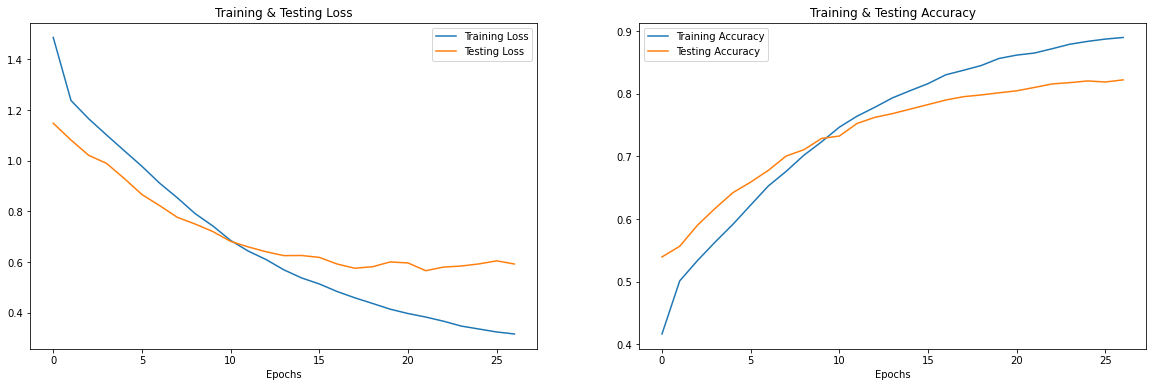

In [ ]:
print("Accuracy of our model on test data : " , round(my_model.evaluate(x_testcnn,y_test)[1],2)*100 , "%")

epochs = [i for i in range(27)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

## Confusion Matrix

In [ ]:
# predicting on test data.
pred_test = my_model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

369/369 [==============================] - 1s 2ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

In [ ]:
df

,Predicted Labels,Actual Labels
0,disgust,disgust
1,happy,happy
2,disgust,disgust
3,disgust,disgust
4,angry,angry
...,...,...
11773,happy,disgust
11774,angry,angry
11775,disgust,fear
11776,angry,angry


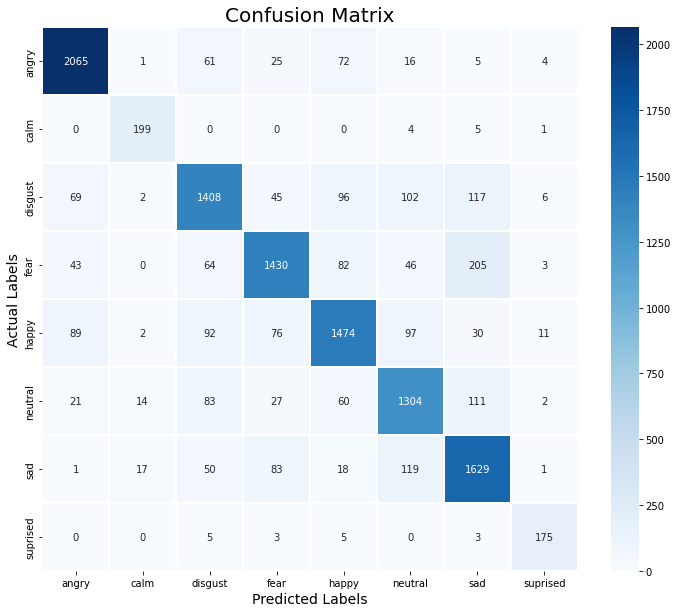

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



       angry       0.90      0.92      0.91      2249

        calm       0.85      0.95      0.90       209

     disgust       0.80      0.76      0.78      1845

        fear       0.85      0.76      0.80      1873

       happy       0.82      0.79      0.80      1871

     neutral       0.77      0.80      0.79      1622

         sad       0.77      0.85      0.81      1918

    suprised       0.86      0.92      0.89       191



    accuracy                           0.82     11778

   macro avg       0.83      0.84      0.83     11778

weighted avg       0.82      0.82      0.82     11778




* Our has a good precision and recall score across all labels
* We overall achieved 82% accuracy on our test data and its very decent but we can improve it more by applying more augmentation techniques and using other feature extraction methods.

In [ ]:
## saving model
import os
from datetime import datetime
def save_model(model , suffix = None) :
  modeldir = os.path.join('/content/drive/MyDrive/SPEECH EMOTION REGCONITION',datetime.now().strftime('%Y%m%d-%H%M%S'))
  modelpath = modeldir + '-' + suffix + '.h5'
  print(f'saving model into {modelpath}')
  model.save(modelpath)
  return modelpath

In [ ]:
save_model(my_model,suffix = 'speech_emotion_recognition_model')

saving model into /content/drive/MyDrive/SPEECH EMOTION REGCONITION/20230214-215629-speech_emotion_recognition_model.h5


'/content/drive/MyDrive/SPEECH EMOTION REGCONITION/20230214-215629-speech_emotion_recognition_model.h5'